<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
  Class                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Class
ham     4827
spam     747
Name: count, dtype: int64


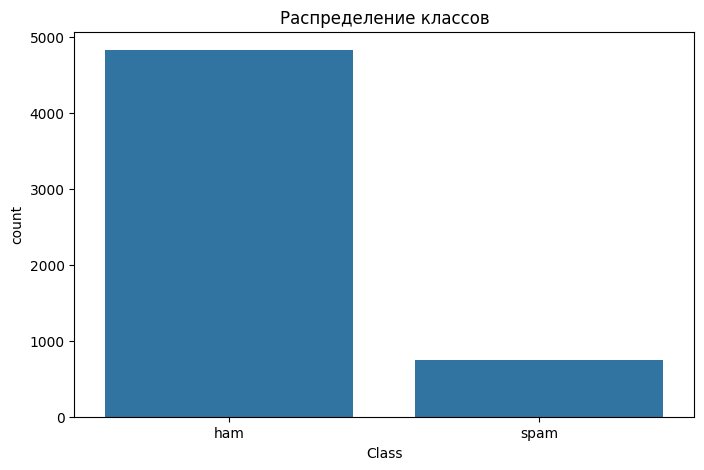

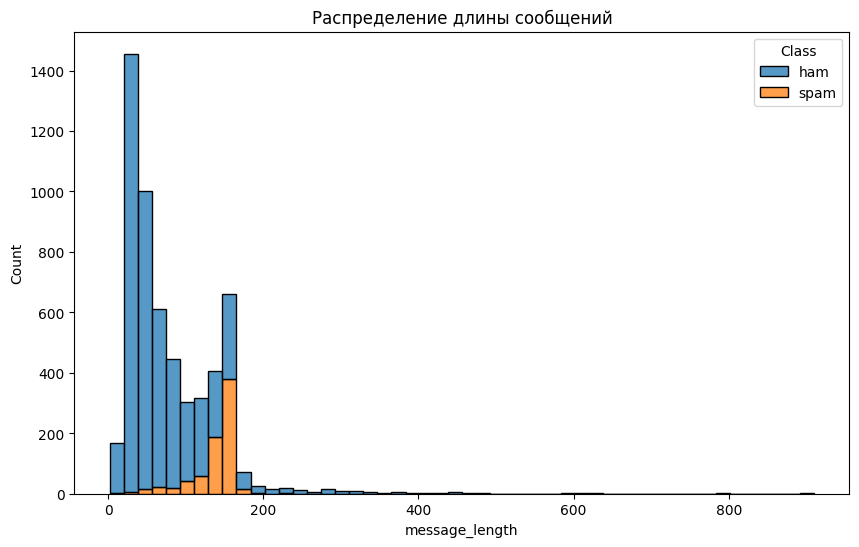

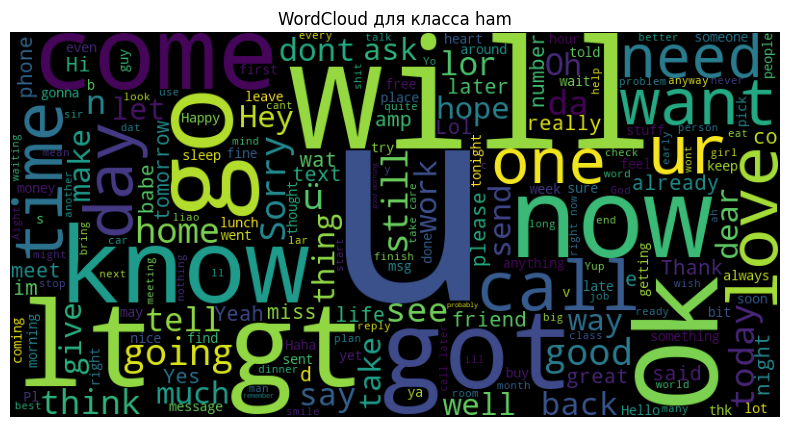

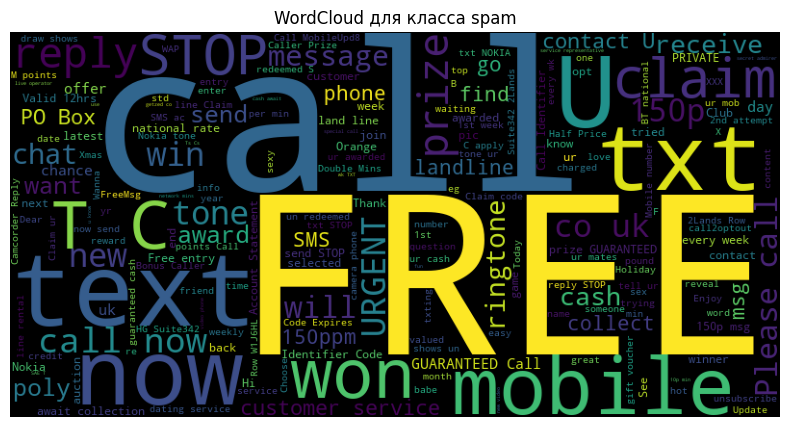

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Загрузка данных
df = pd.read_csv('../data/raw/Spam_SMS.csv')

# 1. Общая информация
print(df.info())
print(df.head())
print(df['Class'].value_counts())

# 2. Визуализация распределения классов
plt.figure(figsize=(8,5))
sns.countplot(x='Class', data=df)
plt.title('Распределение классов')
plt.savefig('../reports/figures/class_distribution.png')
plt.show()

# 3. Анализ длины сообщений
df['message_length'] = df['Message'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='message_length', hue='Class', bins=50, multiple='stack')
plt.title('Распределение длины сообщений')
plt.savefig('../reports/figures/message_length_distribution.png')
plt.show()

# 4. WordCloud для каждого класса
for label in ['ham', 'spam']:
    text = ' '.join(df[df['Class']==label]['Message'].tolist())
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.title(f'WordCloud для класса {label}')
    plt.axis('off')
    plt.savefig(f'../reports/figures/wordcloud_{label}.png')
    plt.show()